# Creating Gaussian Heatmaps for Experiments

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import os
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from keras.preprocessing import image
import cv2
from keras.utils import multi_gpu_model
from scipy import ndimage
from keras.utils import to_categorical
from keras.models import load_model
import json
import torch.nn as nn
import numpy as np
from scipy.ndimage import gaussian_filter

Using TensorFlow backend.


***

In [66]:
pngs = [x.replace('keypoints.json', 'rendered.png') for x in os.listdir('../../data/SMALL_5K_DATASET/SMALL_5K_OPENPOSE/')]

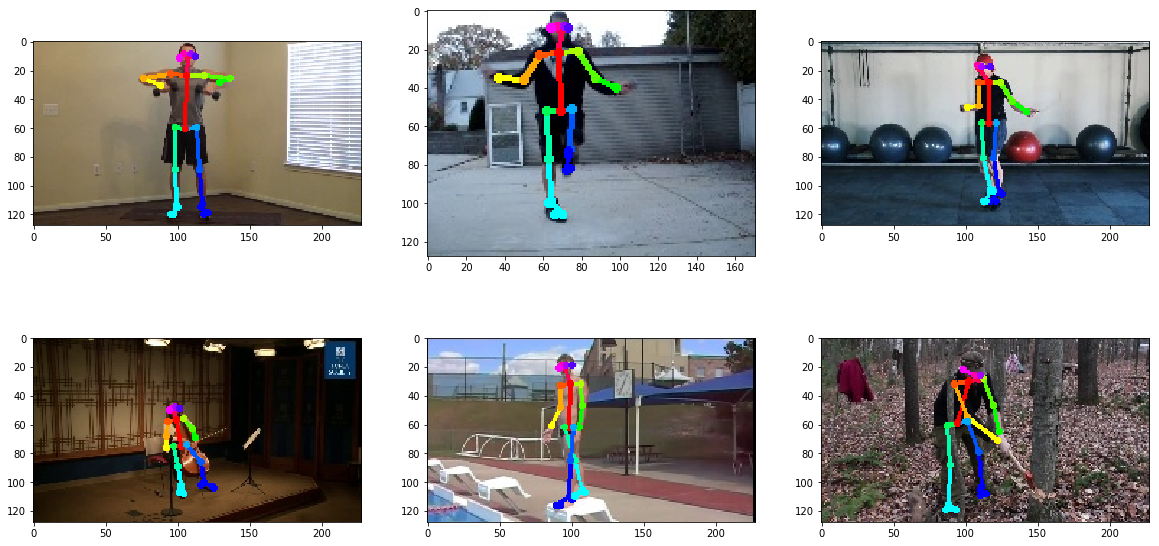

In [2]:
f, ax = plt.subplots(2,3, figsize=(20,10))
c = 0

for i in range(2):
    for j in range(3):
        ax[i,j].imshow(cv2.cvtColor(cv2.imread('OPENPOSE_EX/' + os.listdir('OPENPOSE_EX/')[c]), cv2.COLOR_BGR2RGB))
        c += 1

In [3]:
jsons = [x.replace('rendered.png', 'keypoints.json') for x in os.listdir('OPENPOSE_EX/')]

In [74]:
res_ = []

for j in os.listdir('../../data/SMALL_5K_DATASET/SMALL_5K_OPENPOSE/'):
    
    x = []
    y = []

    for i, p in enumerate(json.load(open('../../data/SMALL_5K_DATASET/SMALL_5K_OPENPOSE/' + j))['people'][0]['pose_keypoints_2d']):
        
        if i % 3 == 0:
            x.append(p)
        elif (i-1) % 3 == 0:
            y.append(p)
            
    impulses = np.zeros(cv2.imread('../../data/SMALL_5K_DATASET/SMALL_5K_MASKS/' + j.replace('_keypoints.json', '.jpg')).shape[:2])
    
    y = np.floor(np.array(y)).astype('int')
    x = np.floor(np.array(x)).astype('int')
        
    for i in range(len(y)):
        if y[i] >= impulses.shape[0] or x[i] >= impulses.shape[1]:
            y[i] = 0
            x[i] = 0
    
    for i in range(len(x)):
        try:
            impulses[y[i], x[i]] = 1
        except:
            print(j)
        
    impulses[0,0] = 0
    
    resu_ = gaussian_filter(impulses, sigma=1, mode='nearest')
    joints_2d = np.zeros(resu_.shape)
    
    for i in range(resu_.shape[0]):
        for k in range(resu_.shape[1]):
            if resu_[i,k] > 0.01:
                min_len = 1000000
                
                for z in range(len(x)):
                    if not (x[z] == 0 and y[z] == 0):
                        dist = np.sqrt((i-y[z])**2 + (k-x[z])**2)
                        if dist < min_len:
                            min_len = dist
                            neighbor = z+1
                
                joints_2d[i,k] = neighbor
                
    resu_ = ((resu_ / np.max(resu_))*255).astype('int')        
    
    np.save('../../data/SMALL_5K_DATASET/SMALL_5K_JOINTPIXELS/'+j.replace('_keypoints.json', ''), impulses)
    np.save('../../data/SMALL_5K_DATASET/SMALL_5K_HEATMAPSOFTMAX/'+j.replace('_keypoints.json', ''), joints_2d)
    cv2.imwrite('../../data/SMALL_5K_DATASET/SMALL_5K_HEATMAPS/' + j.replace('_keypoints.json', '.jpg'), resu_, [cv2.IMWRITE_JPEG_QUALITY, 100])    

(192, 128)
(192, 128)
(192, 128)
(192, 128)
(192, 128)
(192, 128)
(192, 128)
(192, 128)
(192, 128)
(192, 128)
(192, 128)
(192, 128)
(192, 128)
(128, 228)
(128, 228)
(128, 228)
(192, 128)
(128, 228)
(192, 128)
(192, 128)
(192, 128)
(192, 128)
(128, 171)
(192, 128)


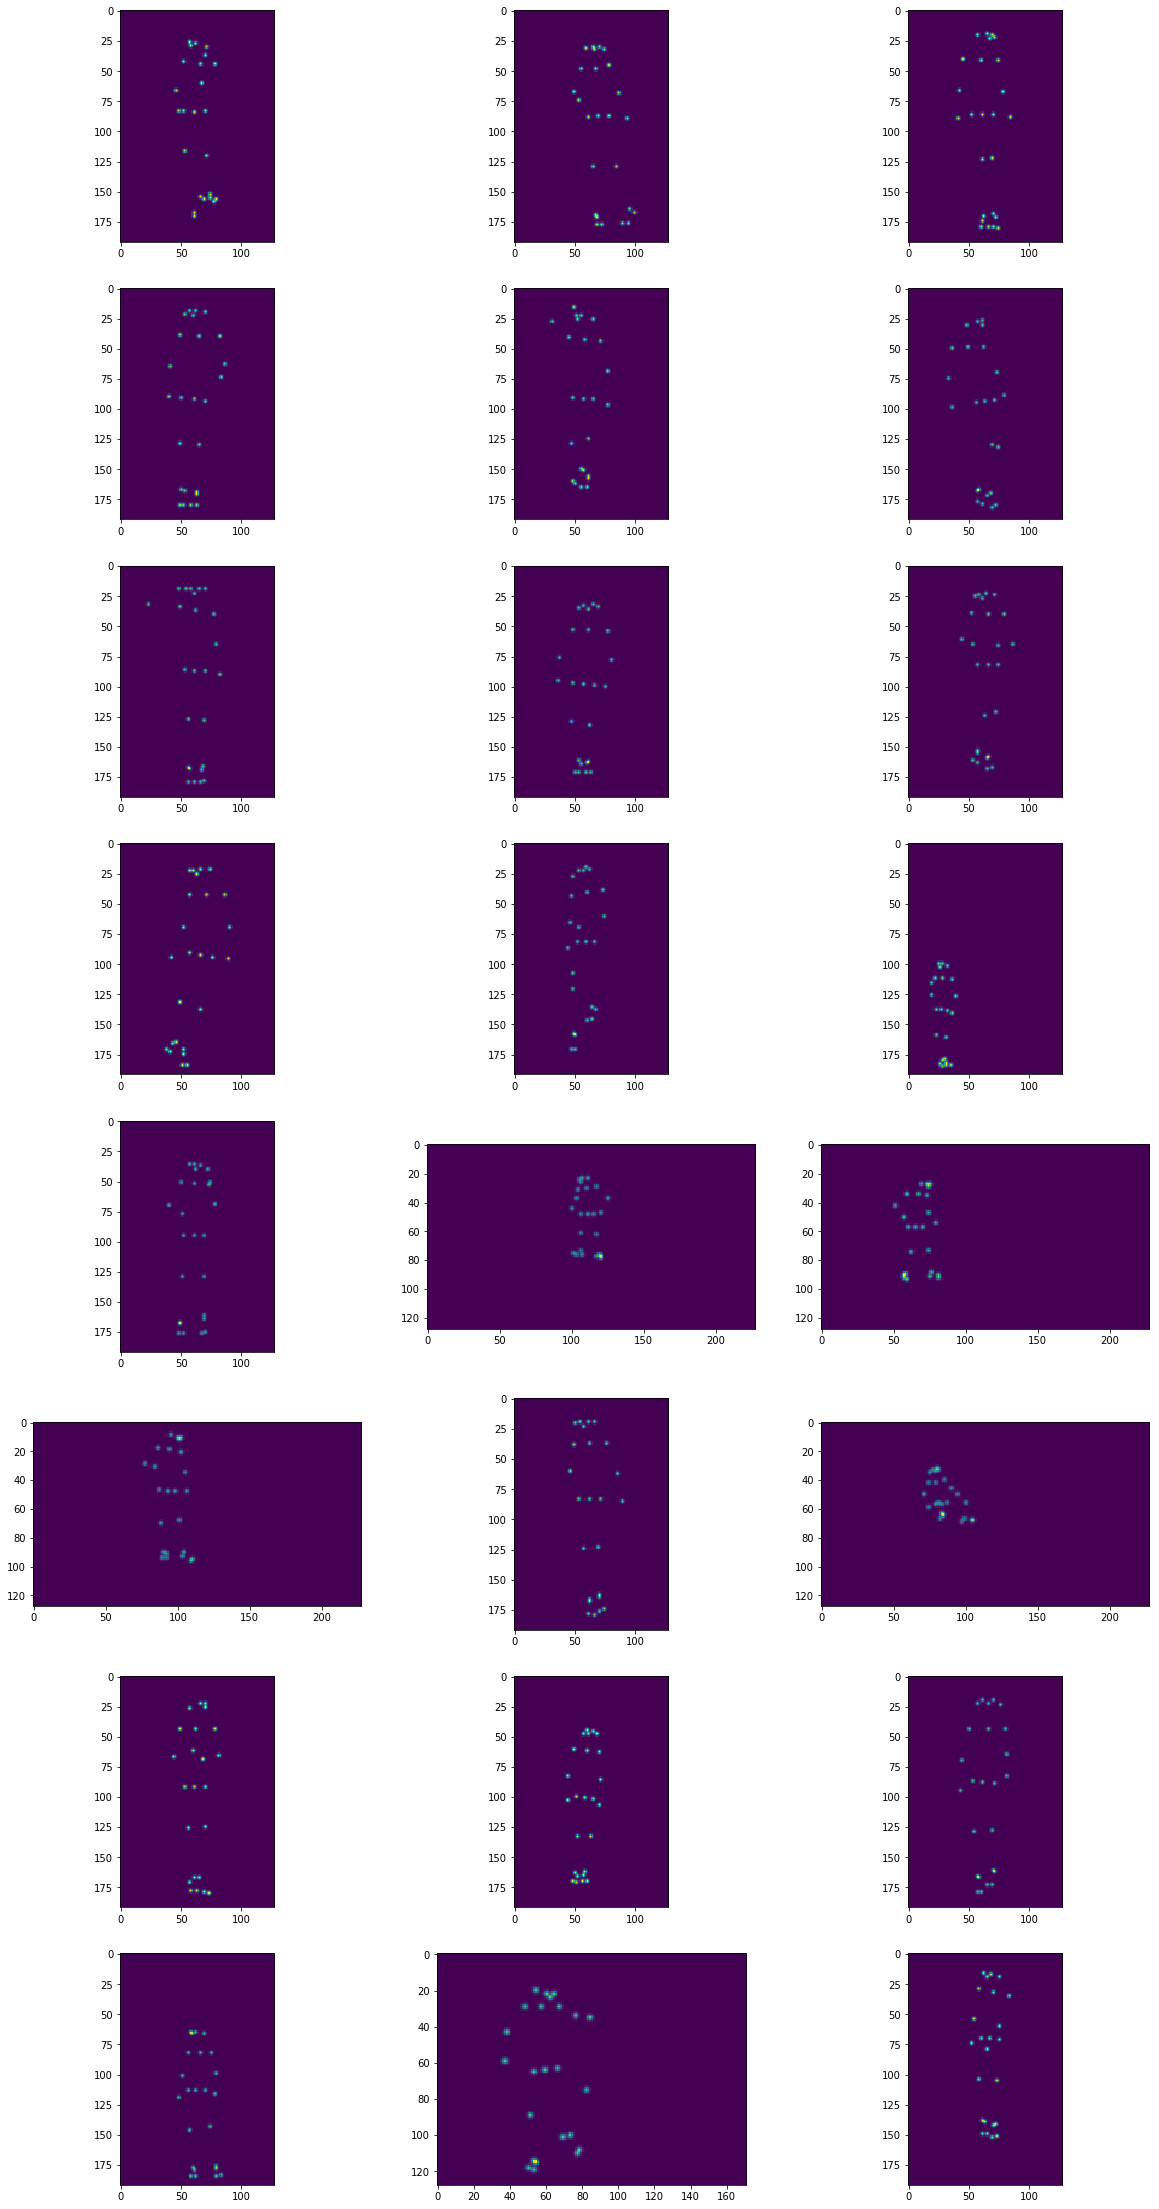

In [7]:
l_ = os.listdir('../../data/SMALL_5K_DATASET/SMALL_5K_HEATMAPS/')

f, ax = plt.subplots(8,3, figsize=(20,40))
c = 0

for i in range(8):
    for j in range(3):
        print((cv2.imread('../../data/SMALL_5K_DATASET/SMALL_5K_HEATMAPS/' + l_[c], 0)/255).shape)
        ax[i,j].imshow(cv2.imread('../../data/SMALL_5K_DATASET/SMALL_5K_HEATMAPS/' + l_[c], 0)/255)
        c += 1

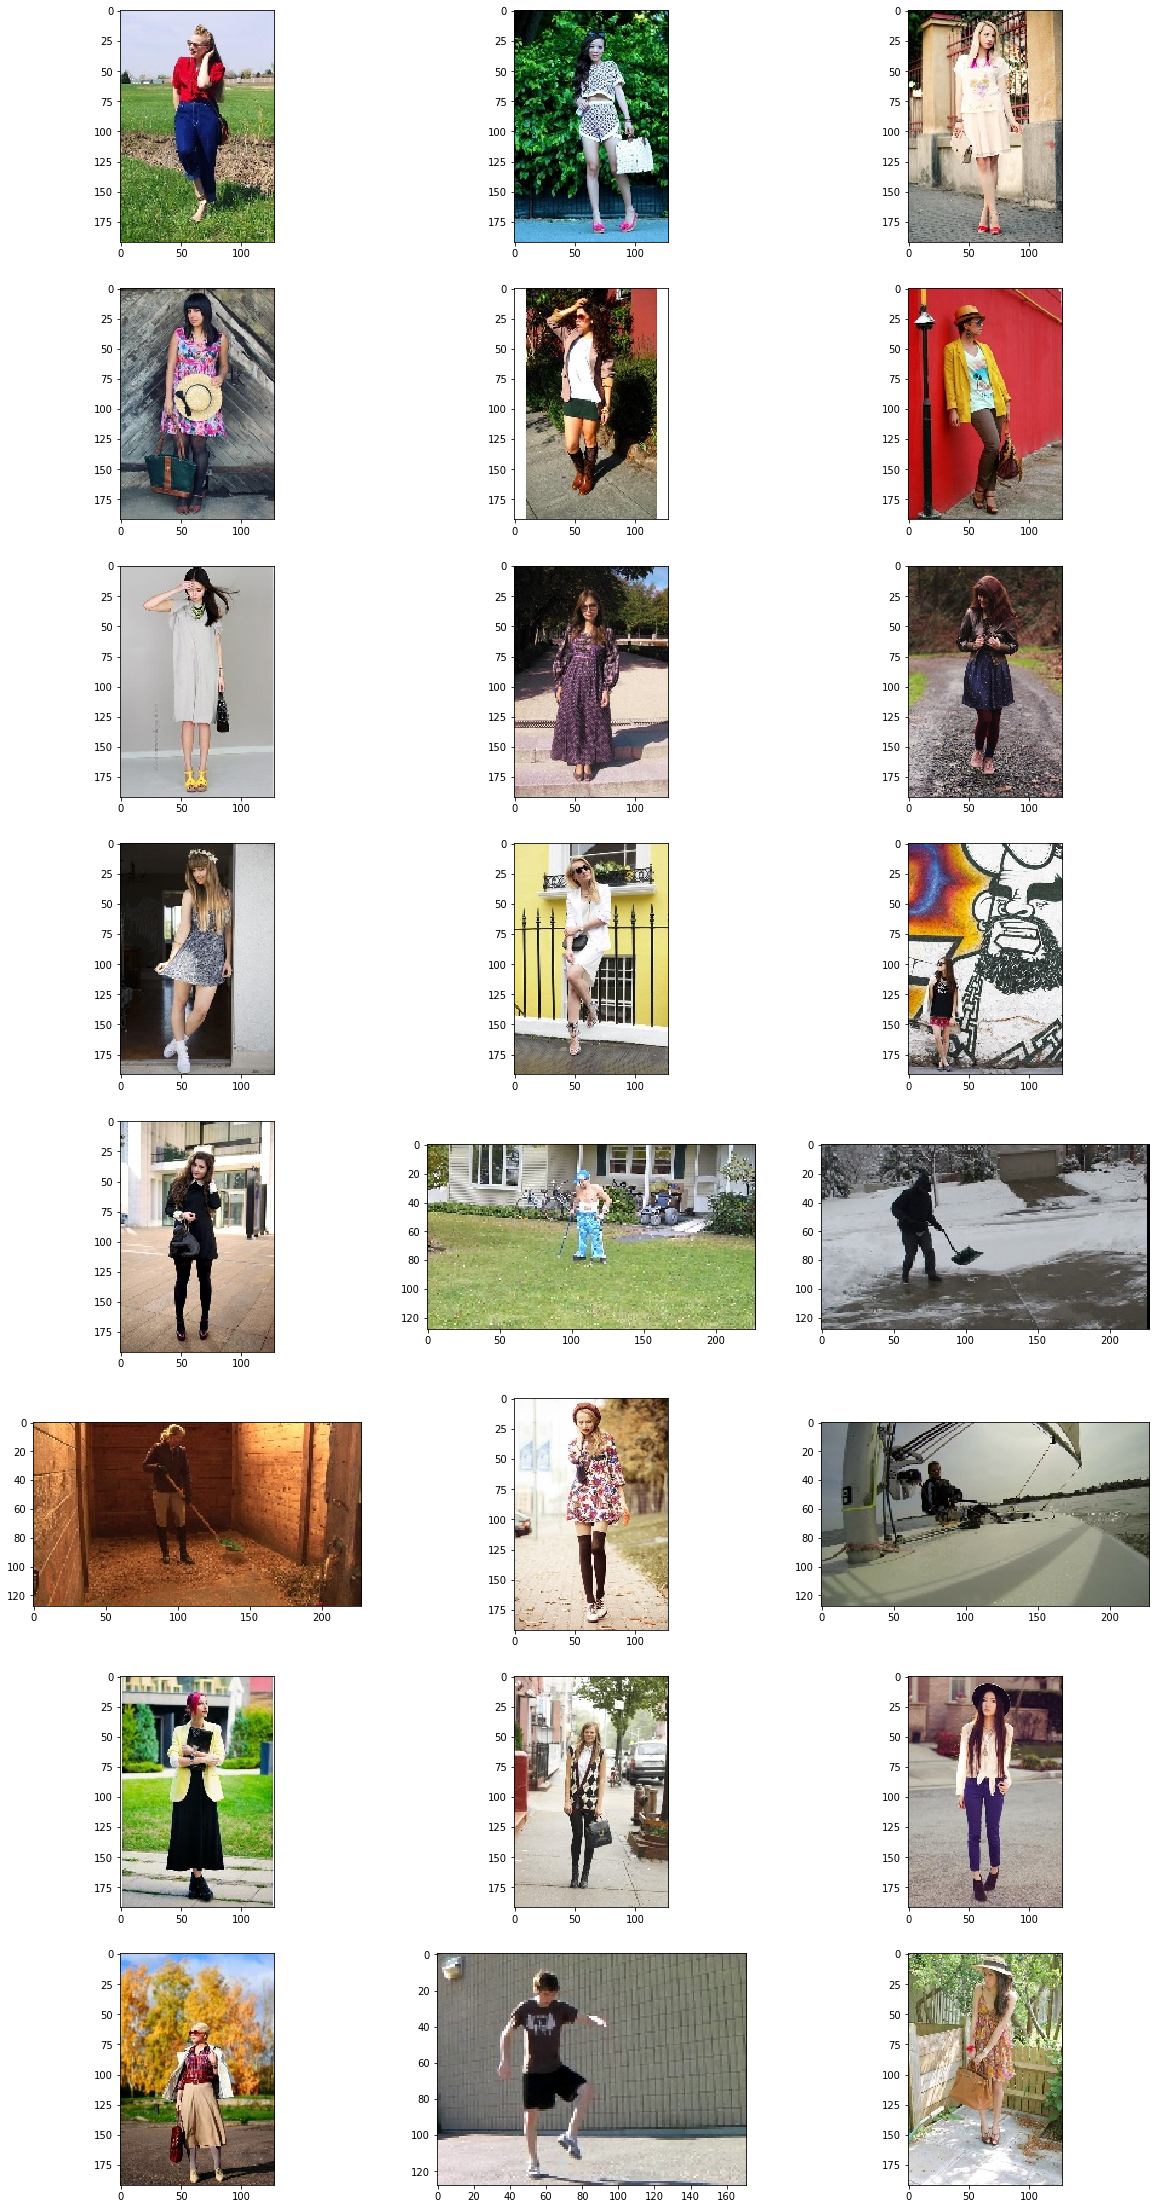

In [5]:
l_ = os.listdir('../../data/SMALL_5K_DATASET/SMALL_5K_IMAGES/')

f, ax = plt.subplots(8,3, figsize=(20,40))
c = 0

for i in range(8):
    for j in range(3):
        
        ax[i,j].imshow(cv2.cvtColor(cv2.imread('../../data/SMALL_5K_DATASET/SMALL_5K_IMAGES/' + l_[c]), cv2.COLOR_BGR2RGB))
        c += 1